# Элементарные методы анализа временных рядов

In [1]:
import numpy as np
import pandas as pd

In [2]:
sales_of_company_x = pd.read_csv("data/Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("data/Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("data/Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("data/Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("data/Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("data/Series/daily-total-female-births-in-cal.csv")

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

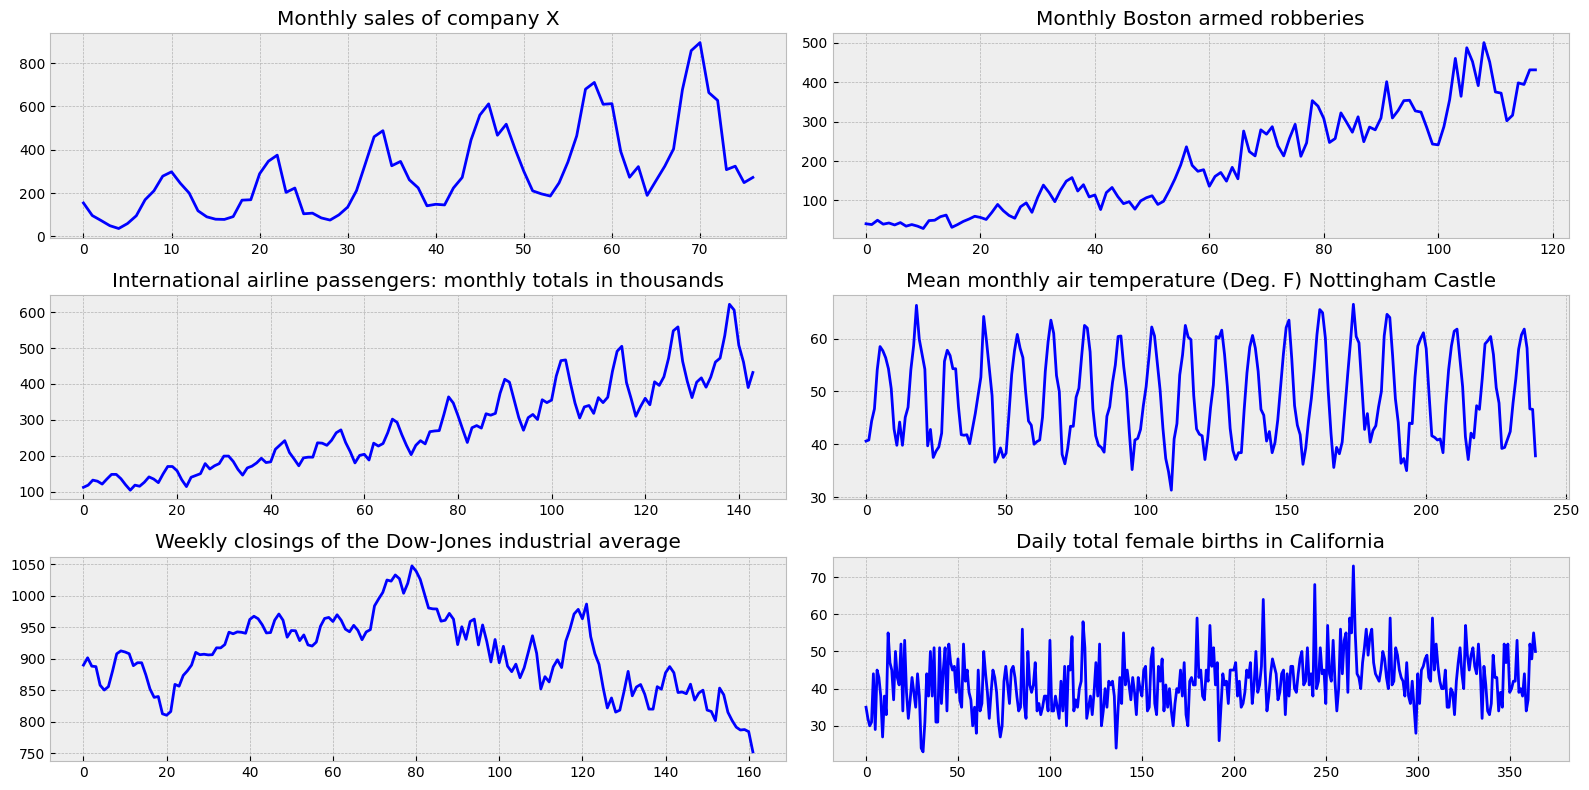

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Скользящее среднее
Начнем моделирлвание с наивного предположения, - "завтра будет так же как вчера"

In [6]:
def moving_average(series, n):
    if not isinstance(series, pd.Series):
        series = pd.Series(series)
    return series.rolling(n).mean() 

In [7]:
ser = moving_average(sales_of_company_x['Count'], 7)

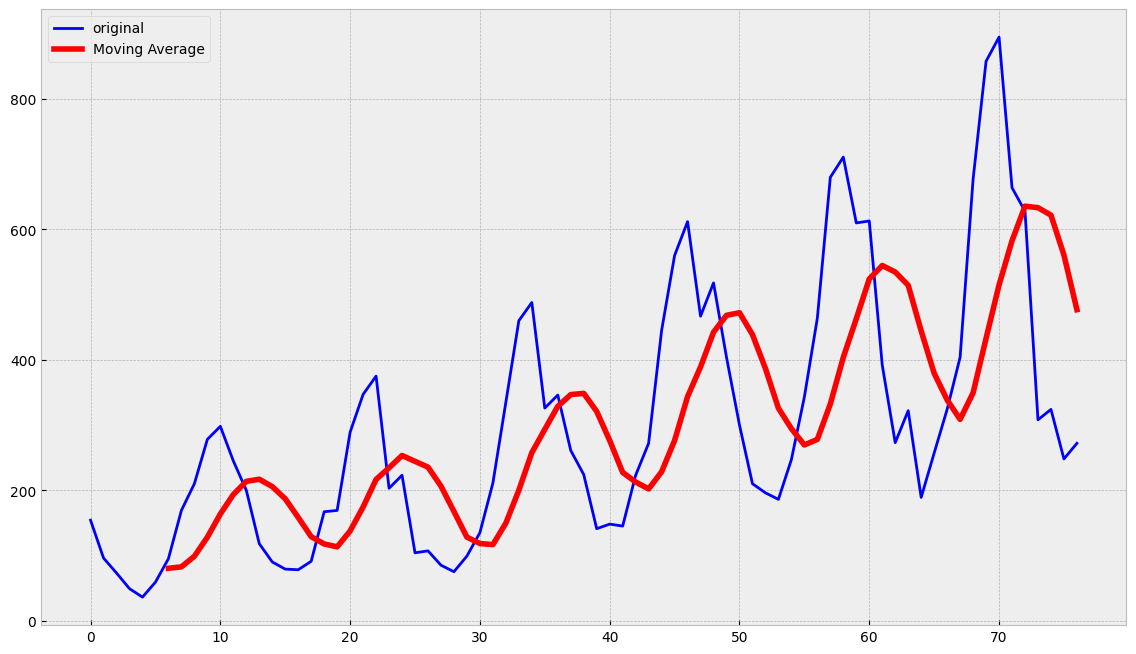

In [8]:
ser = moving_average(sales_of_company_x['Count'], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x['Count'], color='blue', label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [9]:
def predict(series, N, n_pred):
    new_series = series.copy()
    for _ in range(n_pred):
        new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)
        return new_series

In [10]:
series_pred = predict(sales_of_company_x['Count'], 7, 5)

/var/folders/cq/xb4738d94n3gn3zljsgyvvnh0000gp/T/ipykernel_1438/705471751.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_series = new_series.append(pd.Series([new_series[-N:].mean()]), ignore_index=True)


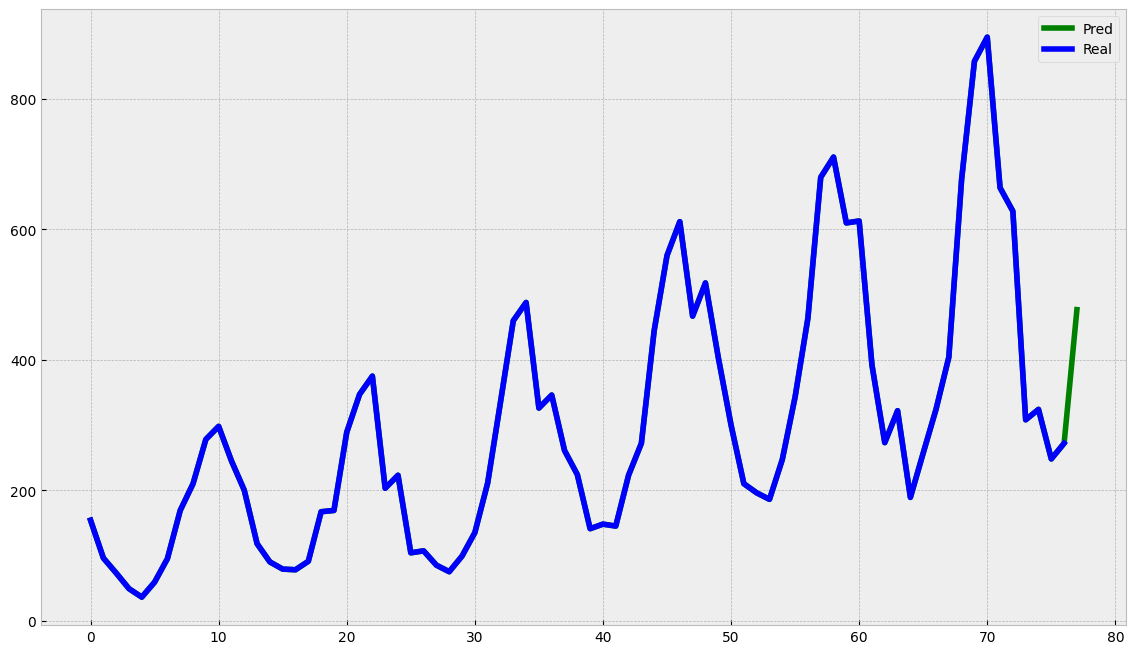

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series_pred, color='green', linewidth='4', label='Pred')
    plt.plot(sales_of_company_x['Count'], linewidth='4', color='blue', label='Real')
    plt.legend()

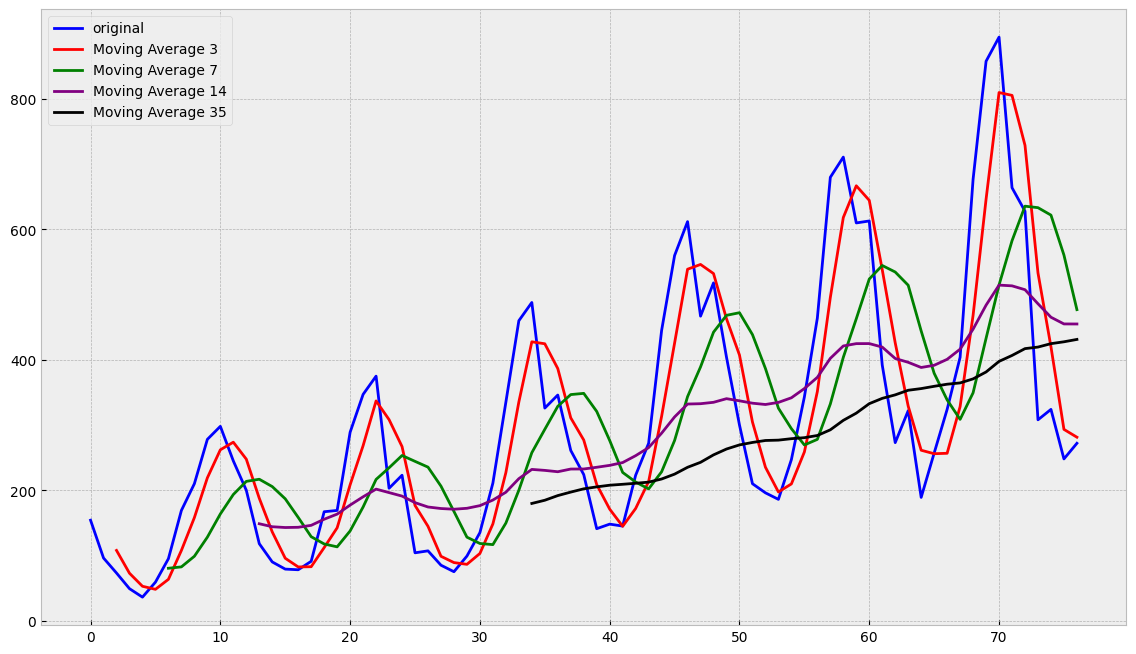

In [12]:
windows = [3, 7, 14, 35]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x['Count'], color='blue', label='original')
    for i in range(len(windows)):
        ser = moving_average(sales_of_company_x['Count'], windows[i])
        plt.plot(ser, color=colors[i], linewidth='2', label=f'Moving Average {windows[i]}')
    plt.legend()

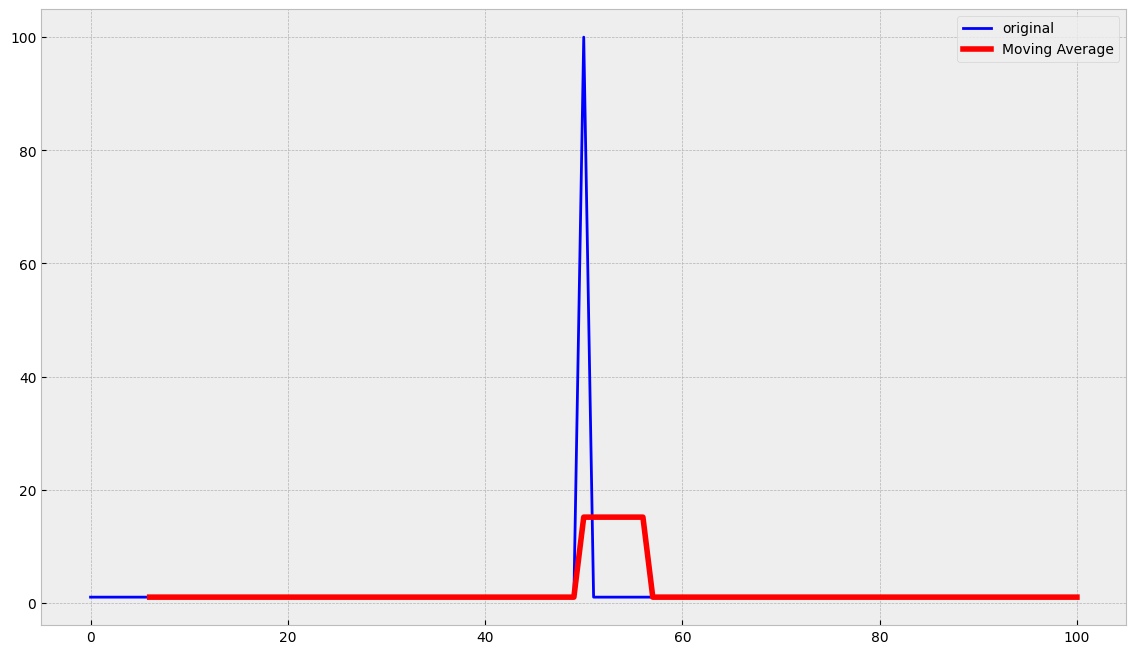

In [13]:
ts = pd.Series([1 for i in range(50)] + [100] + [1 for i in range(50)])
ser = moving_average(ts, 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue', label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

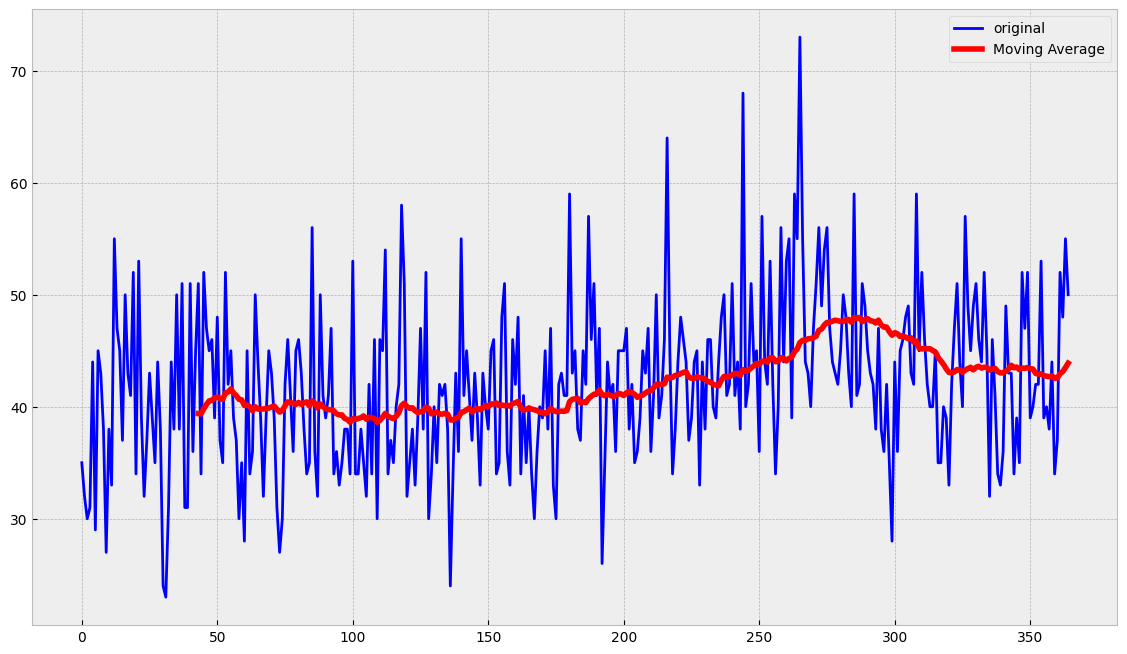

In [14]:
ts = female_births['Count']
ser = moving_average(ts, 44)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue', label='original')
    plt.plot(ser, color='red', linewidth='4', label='Moving Average')
    plt.legend()

# Случайный шум, усредненный скользящим средним

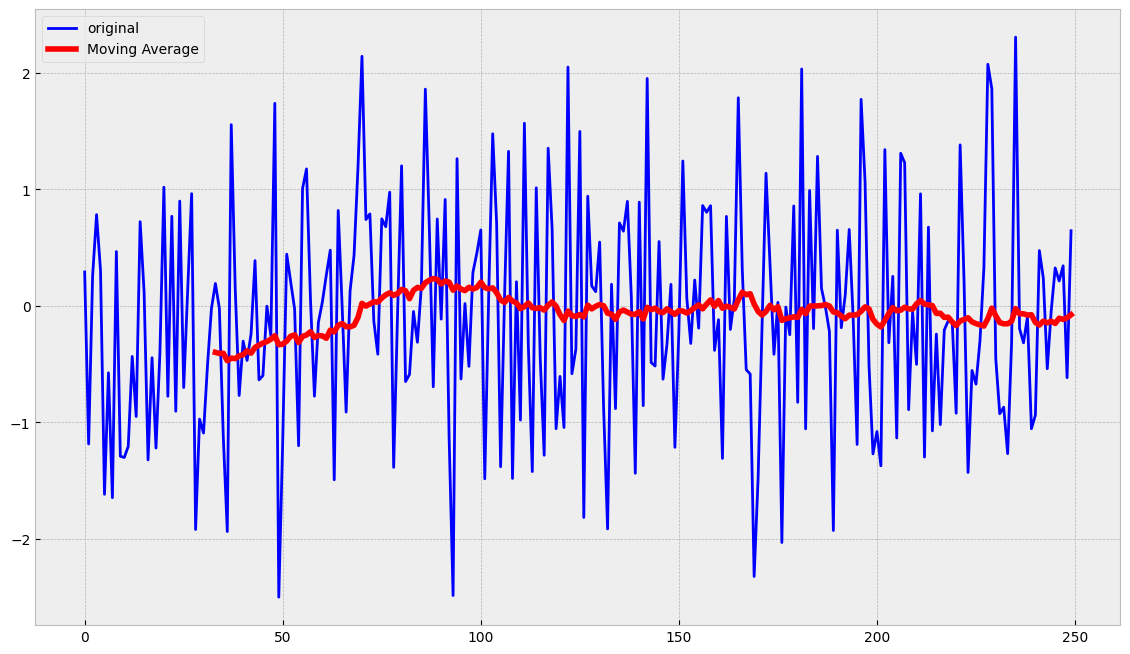

In [15]:
random_noise = pd.Series(np.random.randn(250))
ma_on_noise = moving_average(random_noise, 34)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(random_noise, color='blue', label='original')
    plt.plot(ma_on_noise, color='red', linewidth='4', label='Moving Average')
    plt.legend()

# Случайный шум, с трендом усредненный скользящим средним

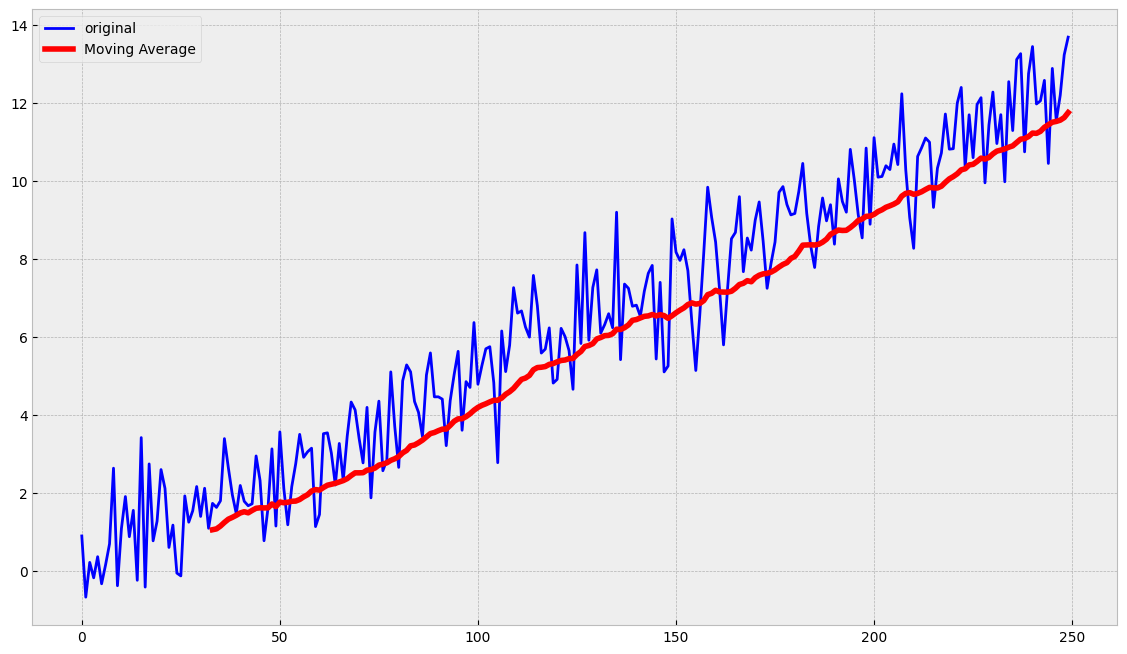

In [16]:
random_noise = np.random.randn(250)
k = .05
b = 0
random_noise_trend = pd.Series([k * i + b + random_noise[i] for i in range(len(random_noise))])
ma_on_noise_trend = moving_average(random_noise_trend, 34)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(random_noise_trend, color='blue', label='original')
    plt.plot(ma_on_noise_trend, color='red', linewidth='4', label='Moving Average')
    plt.legend()

In [17]:
def weighted_moving_average(series, n, weights):
    if not isinstance(weights, np.ndarray):
        weights = np.array(weights)
    if not isinstance(series, pd.Series):
        series = np.Series(series)
    wma = series.rolling(n).apply(lambda s: (s * weights).sum() / weights.sum(), raw=True)
    return wma

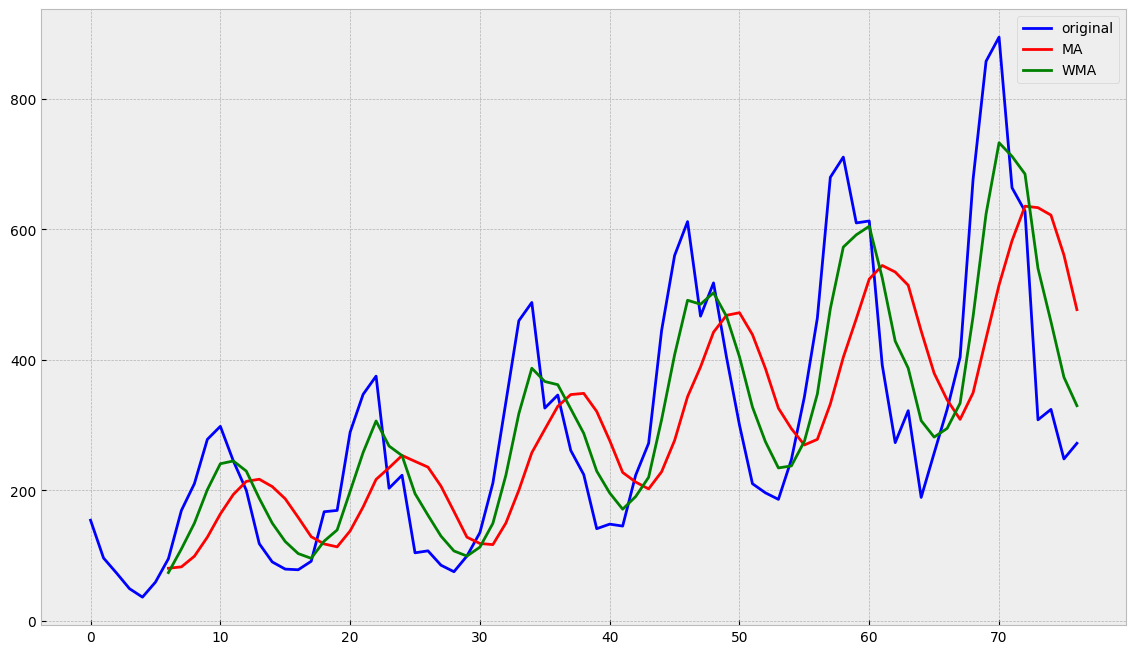

In [18]:
wma = weighted_moving_average(sales_of_company_x['Count'], 7, [1,1, 2,3,5,8,13])
ma = moving_average(sales_of_company_x['Count'], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x['Count'], color='blue', label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.legend()

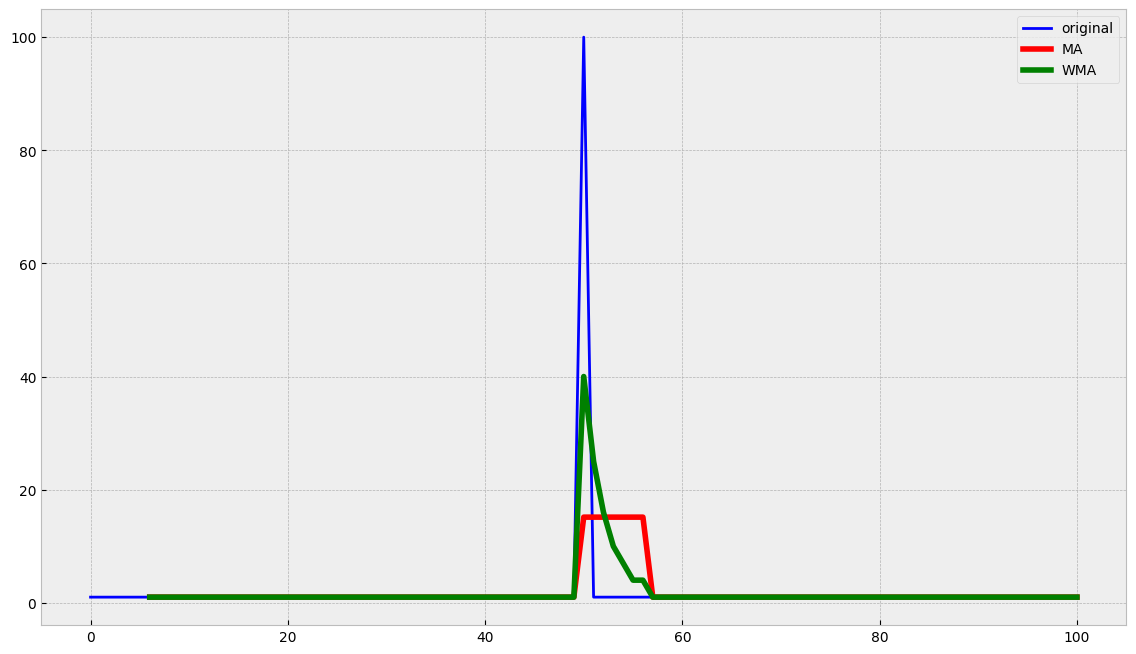

In [19]:
ts = pd.Series([1 for i in range(50)] + [100] + [1 for i in range(50)])
ma = moving_average(ts, 7)
wma = weighted_moving_average(ts, 7, [1,1,2,3,5,8,13])
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue',label='original')
    plt.plot(ma, color='red', linewidth='4', label='MA')
    plt.plot(wma, color='green', linewidth='4', label='WMA')
    plt.legend()

In [20]:
series = robberies_in_boston['Count']
wma_fib = weighted_moving_average(series, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(series, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(series, 7, [1,2,4,8,16,32,64])

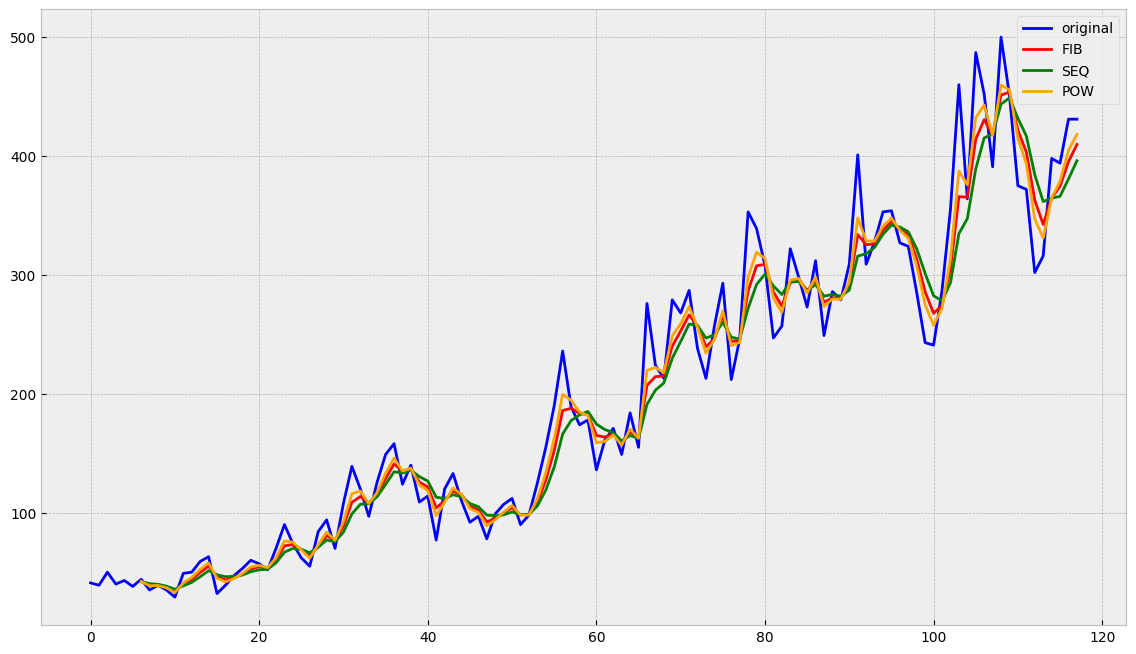

In [21]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series, color='blue', label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

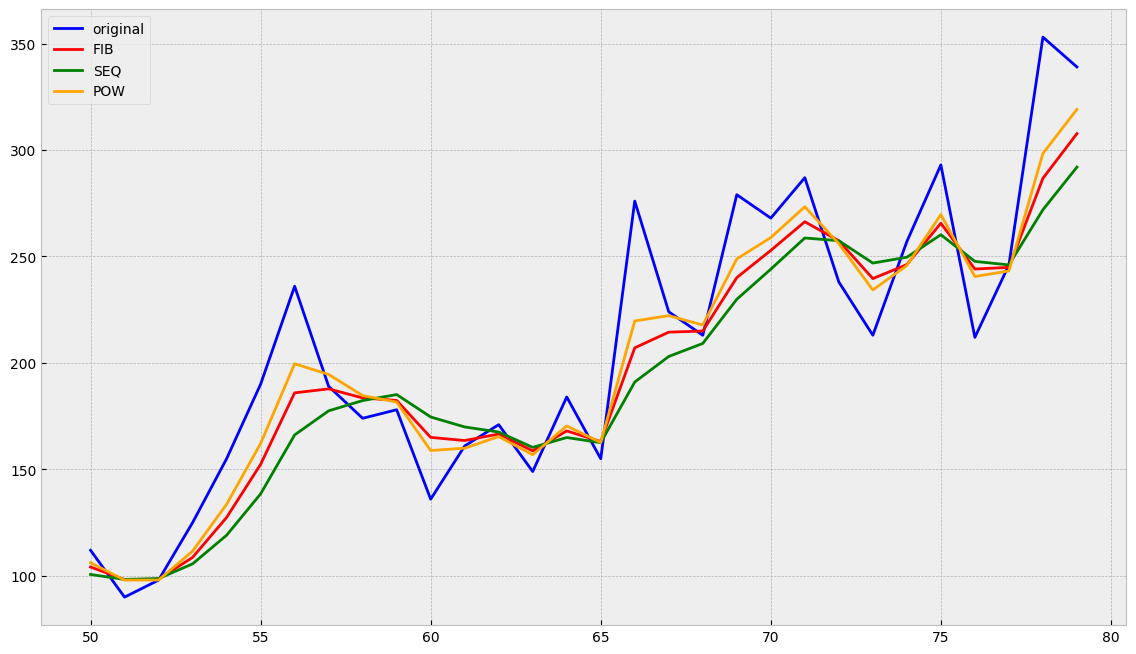

In [22]:
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(series[50:80], color='blue', label='original')
    
    plt.plot(wma_fib[50:80], color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq[50:80], color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow[50:80], color='orange', linewidth='2', label='POW')
    plt.legend()

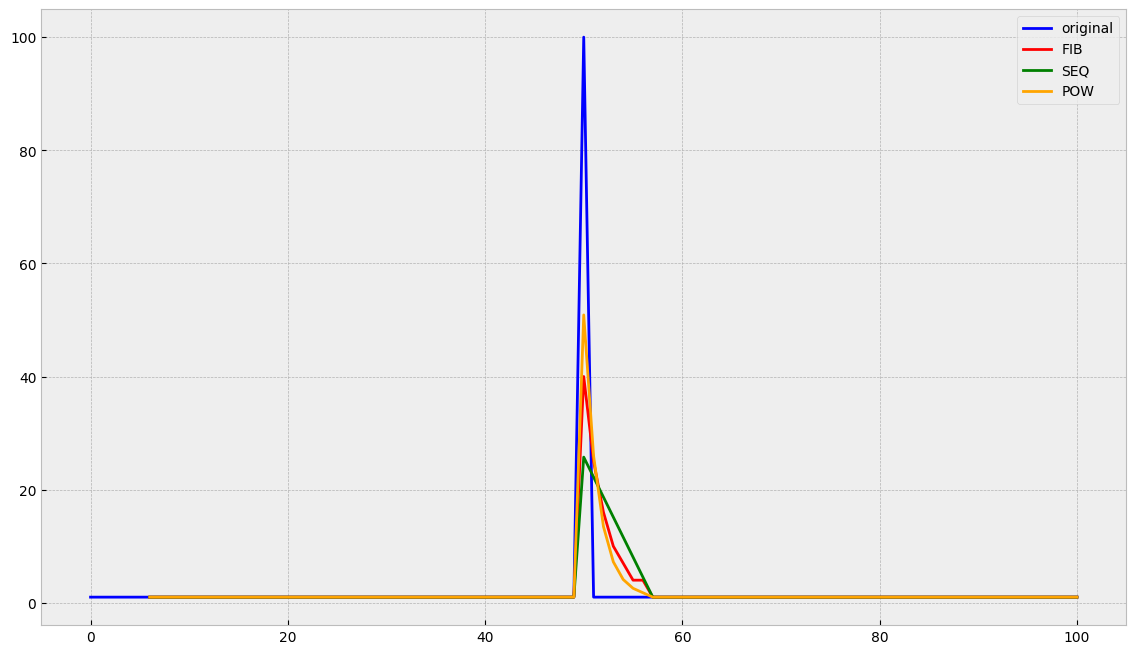

In [23]:
ts = pd.Series([1 for i in range(50)] + [100] + [1 for i in range(50)])
wma_fib = weighted_moving_average(ts, 7, [1,1,2,3,5,8,13])
wma_seq = weighted_moving_average(ts, 7, [1,2,3,4,5,6,7])
wma_pow = weighted_moving_average(ts, 7, [1,2,4,8,16,32,64])
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(ts, color='blue', label='original')
    
    plt.plot(wma_fib, color='red', linewidth='2', label='FIB')
    plt.plot(wma_seq, color='green', linewidth='2', label='SEQ')
    plt.plot(wma_pow, color='orange', linewidth='2', label='POW')
    plt.legend()

# Экспотенциальное среднее

In [24]:
def exponential_moving_average(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n - 1])
    return pd.Series(result)

In [25]:
ema = exponential_moving_average(sales_of_company_x['Count'], 0.2)

In [26]:
len(ema)

77

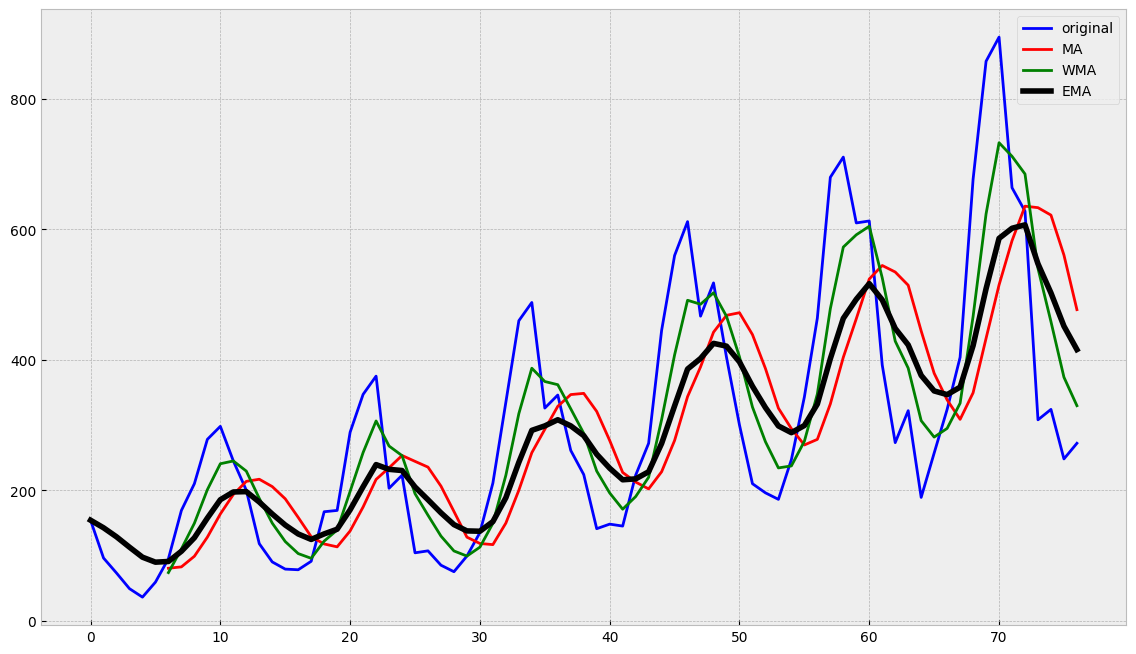

In [27]:
ema = exponential_moving_average(sales_of_company_x["Count"], 0.2)
wma = weighted_moving_average(sales_of_company_x["Count"], 7, [1,1,2,3,5,8,13])
ma = moving_average(sales_of_company_x["Count"], 7)
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    plt.plot(sales_of_company_x["Count"], color='blue',label='original')
    plt.plot(ma, color='red', linewidth='2', label='MA')
    plt.plot(wma, color='green', linewidth='2', label='WMA')
    plt.plot(ema, color='black', linewidth='4', label='EMA')
    plt.legend()

 # Двойное экспотенциальное сглаживание

In [28]:
def double_ema(series, alpha, beta):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level-last_level) + (1 - beta) * trend
        result.append(level + trend)
    return pd.Series(result)

In [29]:
def plot_dema(alpha, beta):
    dema = double_ema(sales_of_company_x['Count'], alpha, beta)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(sales_of_company_x["Count"], color='blue',label='original')
        plt.plot(dema, color='red', linewidth='2', label='DEMA')
        plt.title(f'alpha={alpha}, beta={beta}')
        plt.legend()

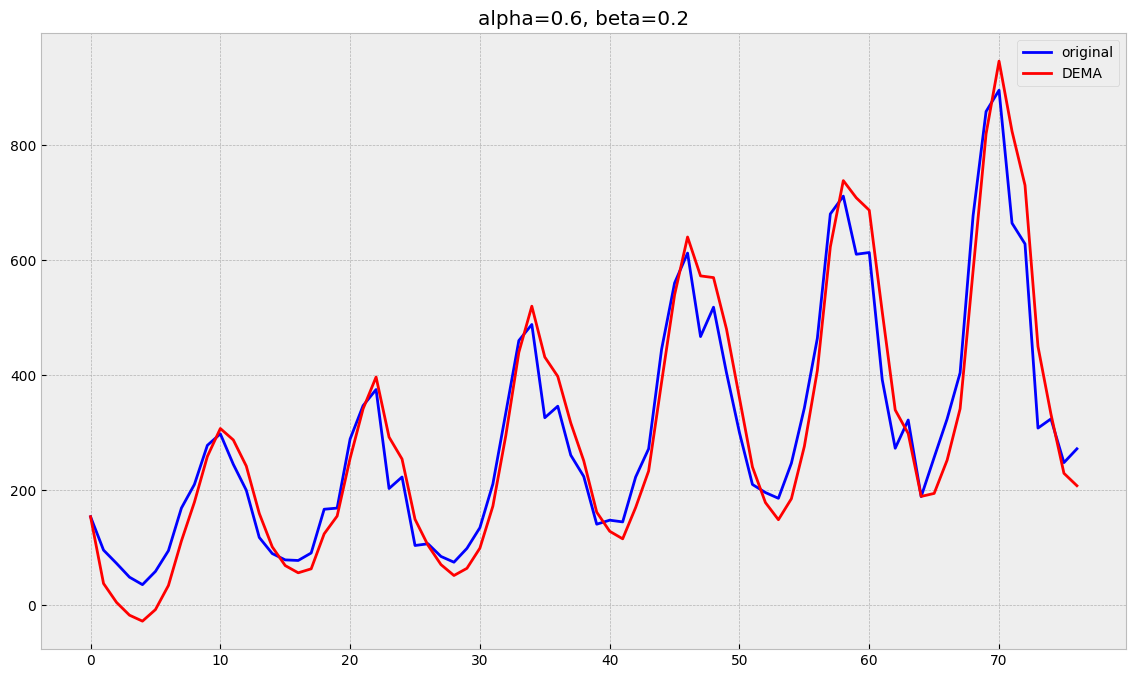

In [30]:
plot_dema(.6, .2)

In [31]:
def double_ema_with_preds(series, alpha, beta, n_preds):
    result = [series[0]]
    level, trend = series[0], series[1] - series[0]
    for n in range(1, len(series)):
        value = series[n]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta * (level - last_level) + (1 - beta) * trend
        result.append(level + trend)
    
    preds = []
    for n in range(n_preds):
        value = result[-1]
        last_level, level = level, alpha * value + (1 - alpha) * (level + trend)
        trend = beta*(level-last_level) + (1 - beta) * trend
        result.append(level + trend)
        preds.append(level + trend)
    
    return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)

/var/folders/cq/xb4738d94n3gn3zljsgyvvnh0000gp/T/ipykernel_1438/3538844754.py:18: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return series.append(pd.Series(preds), ignore_index=True), pd.Series(result)


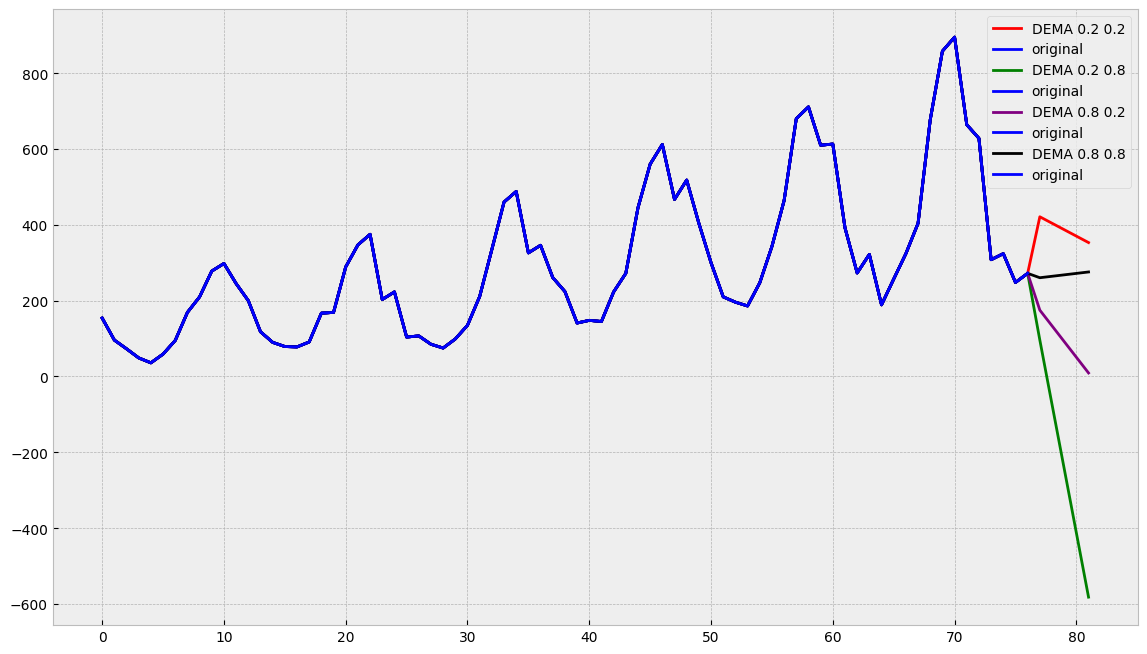

In [32]:
alphas = [.2, .2, .8, .8]
bettas = [.2, .8, .2, .8]
colors = ['red', 'green', 'purple', 'black']
with plt.style.context('bmh'):
    plt.figure(figsize=(14, 8))
    for i in range(len(alphas)):
        ser, _ = double_ema_with_preds(sales_of_company_x['Count'], alphas[i], bettas[i], 5)
        plt.plot(ser, color=colors[i], linewidth='2', label=f'DEMA {alphas[i]} {bettas[i]}')
        plt.plot(sales_of_company_x['Count'], color='blue', label='original')
        plt.legend()

# Хольт-Винтерс

In [33]:
def initial_trend(series, season_len):
    return sum([float(series[i + season_len] - series[i]) / season_len]) /season_len

In [34]:
def initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series) / slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = .0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen * j + i] - season_averages[j]
        seasonals[i] = sum_of_vals_over_avg / n_seasons
    return seasonals

In [35]:
def triple_expotential_smoothing(series, slen, alpha, beta, gamma, n_preds):
    result = []
    seasonals = initial_seasonal_components(series, slen)
    for i in range(len(series) + n_preds):
        if i == 0: # initial values
            smooth = series[0]
            trend = initial_trend(series, slen)
            result.append(series[0])
            continue
        if i >= len(series): # we are forecasting
            m = i - len(series) + 1
            result.append((smooth + m * trend) + seasonals[i%slen])
        else:
            val = series[i]
            last_smooth, smooth = smooth, alpha * (val-seasonals[i%slen]) + (1 - alpha) * (smooth+trend)
            trend = beta * (smooth-last_smooth) + (1 - beta)*trend
            seasonals[i%slen] = gamma*(val-smooth) + (1 - gamma)*seasonals[i%slen]
            result.append(smooth+trend+seasonals[i%slen])
    return result

In [38]:
def plot_tema(alpha, beta, gamma, ser=sales_of_company_x['Count'], ser_to_plot=sales_of_company_x['Count'], 
              n_preds=24):
    tema = triple_expotential_smoothing(ser, 12, alpha, beta, gamma, n_preds)
    with plt.style.context('bmh'):
        plt.figure(figsize=(14, 8))
        plt.plot(ser_to_plot, color='blue', label='original')
        plt.plot(tema, color='red', linewidth='4', label='TEMA')
        plt.title(f'alpha={alpha}, beta={beta}, gamma={gamma}')
        plt.legend()

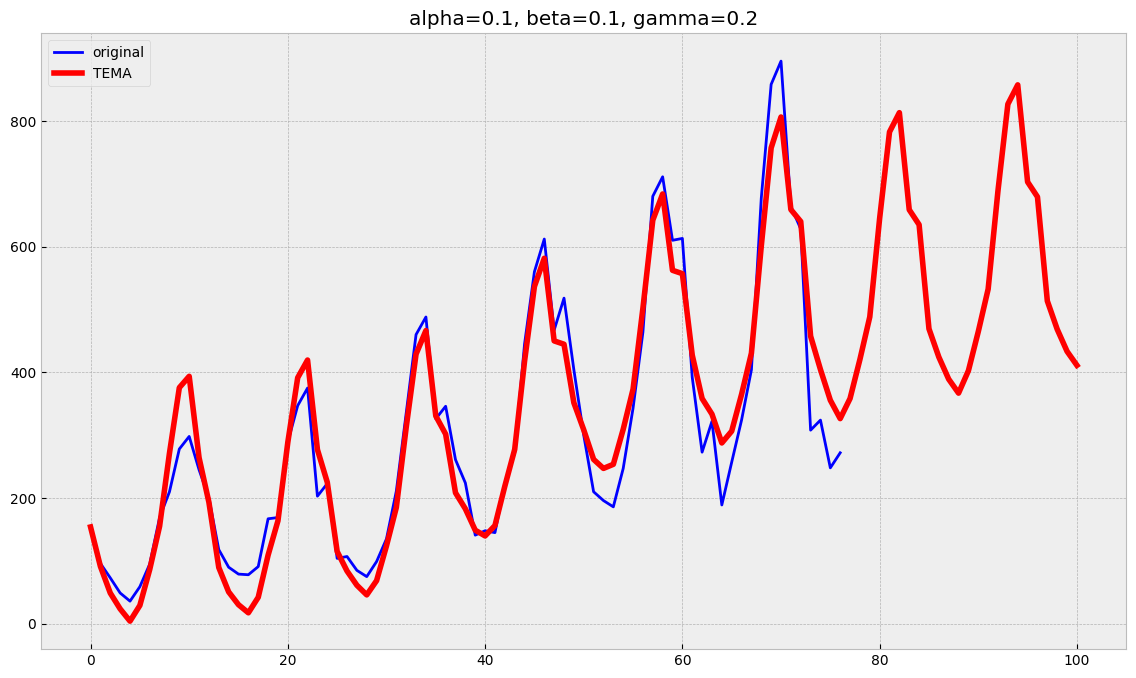

In [39]:
plot_tema(.1, .1, .2)

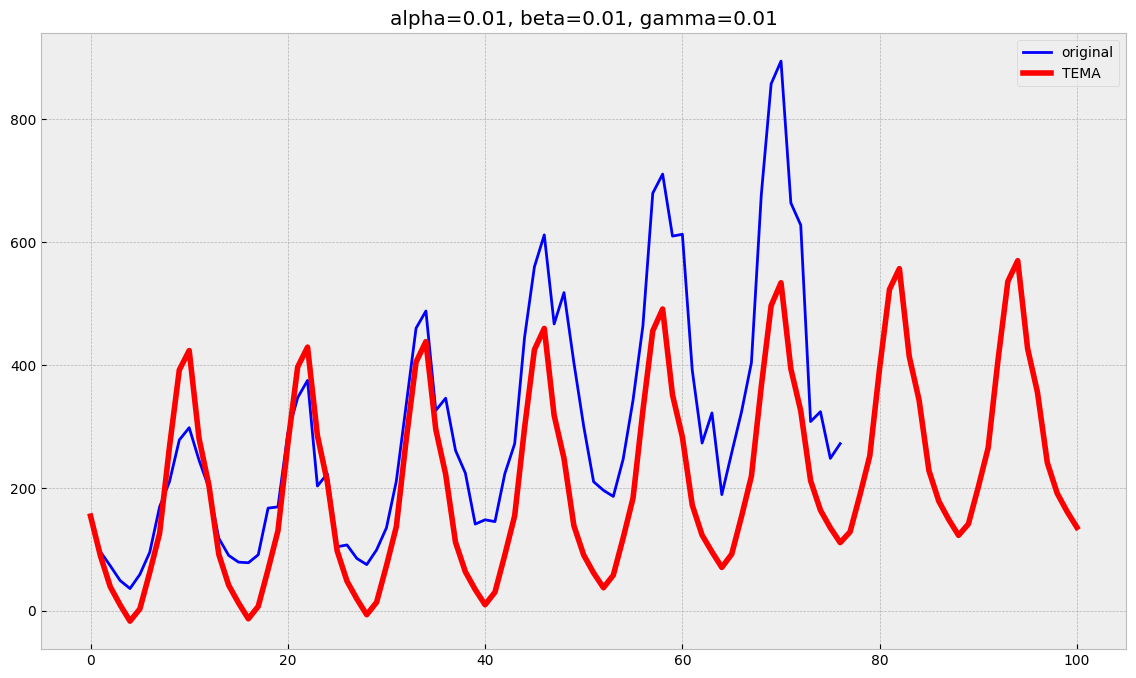

In [41]:
plot_tema(.01, .01, .01)

# Подбор параметров

Что значит, что наша модель лучше всего приближает исходные данные? Это значит, что минимизируется некоторая функция ошибки. Мы, для простоты, будет считать стандарнтый RMSE:

$RMSE =  \sqrt {1/n \sum^N_{i=1} (\hat{y}_i - y_i)^2}$

Алгоритм поиска стандартный - метод градиентного спуска. Считаем производный по каждому из параметров и спускаемся в сторону минимума.

In [43]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

In [44]:
series = sales_of_company_x['Count']

In [45]:
train, test, val = series[:60], series[60:70], series[70:]

In [49]:
def mse(X):
    alpha, beta, gamma = X
    result = triple_expotential_smoothing(train, 12, alpha, beta, gamma, len(test))
    predictions = result[-len(test):]
    error = mean_squared_error(predictions, test)
    return error

In [50]:
opt = minimize(mse, x0=[0,0,0], method="L-BFGS-B", bounds=((0, 1), (0, 1), (0, 1)))

In [52]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 4491.365465857411
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([1949.62885974, 1450.08034527, 1559.74775351])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 176
      nit: 18
     njev: 44
   status: 0
  success: True
        x: array([0.1217687 , 0.328305  , 0.79253386])


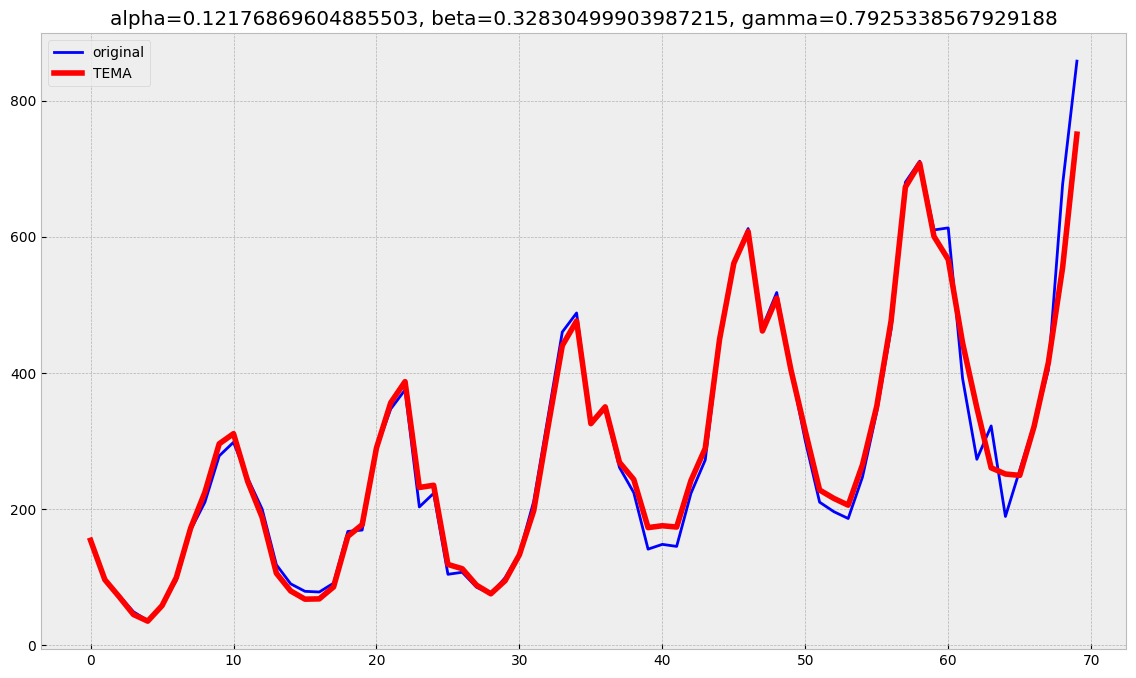

In [53]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series[:70], n_preds=len(test))

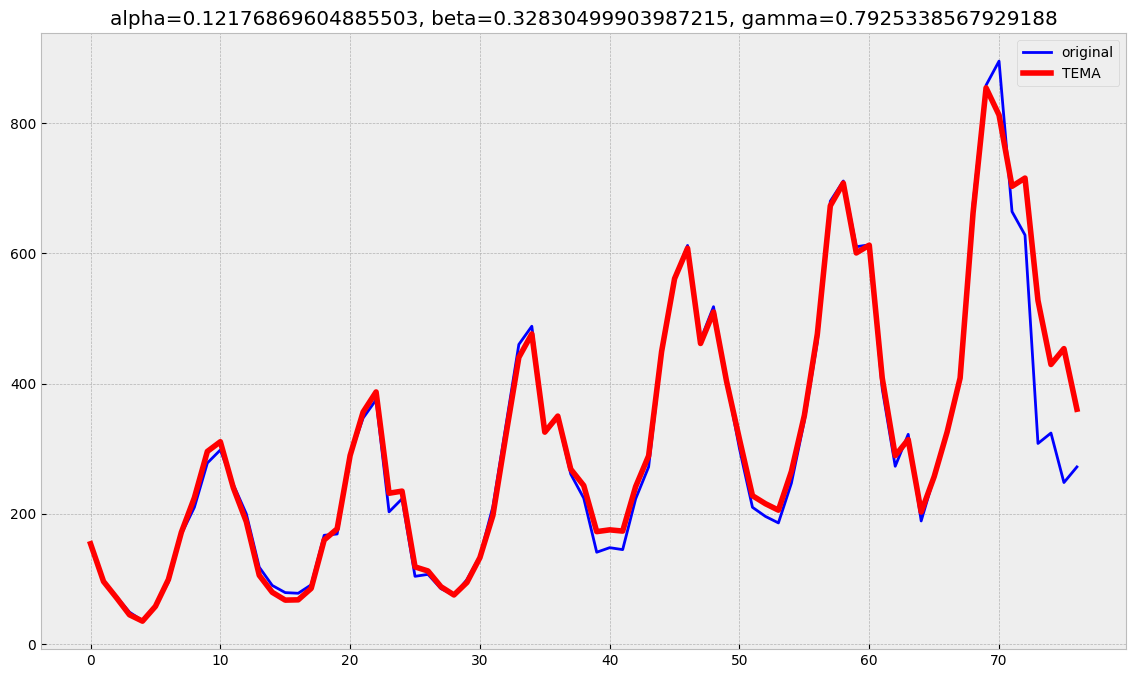

In [55]:
3 plot_tema(alpha_opt, beta_opt, gamma_opt, ser=series[:70], ser_to_plot=series, n_preds=len(val))

# Кросс-валидация

Проблема кросс-валидации на временных рядах состоит в том, что случайно перемешивать в фолдах значения всего ряда нельзя. Т.к. он имеет временную структуру, и ее надо сохранять (иначе потеряются все взаимосвязи наблюдений);

Будем делать кросс-валидацию на скользящем окне.

Суть достаточно проста:
1. Берем t измерений
2. Делаем прогноз на n измерений вперед и считаем ошибку
3. Берем t+n измерений
4. Делаем прогноз на n измерений вперед и считаем ошибку
5. Берем t+2*n измерений
6. Делаем прогноз на n измерений вперед и считаем ошибку
...

In [56]:
train, val = series[:65], series[65:]

In [59]:
from sklearn.model_selection import TimeSeriesSplit

def mse_cross_val(X):
    alpha, beta, gamma = X
    split = TimeSeriesSplit(n_splits=3)
    errors = []
    
    for train_split, test_split in split.split(train):
        result = triple_expotential_smoothing(train_split, 12, alpha, beta, gamma, len(test_split))
        predictions = result[-len(test_split):]
        error = mean_squared_error(predictions, test_split)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [60]:
opt = minimize(mse_cross_val, x0=[0,0,0], method='L-BFGS-B', bounds=((0, 1), (0, 1), (0, 1)))

In [61]:
alpha_opt, beta_opt, gamma_opt = opt.x
print(opt)

      fun: 0.21919003380603716
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-5.26884092e-05, -2.15161222e-05, -3.35842463e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 224
      nit: 45
     njev: 56
   status: 0
  success: True
        x: array([0.09054013, 0.24441184, 0.89935502])


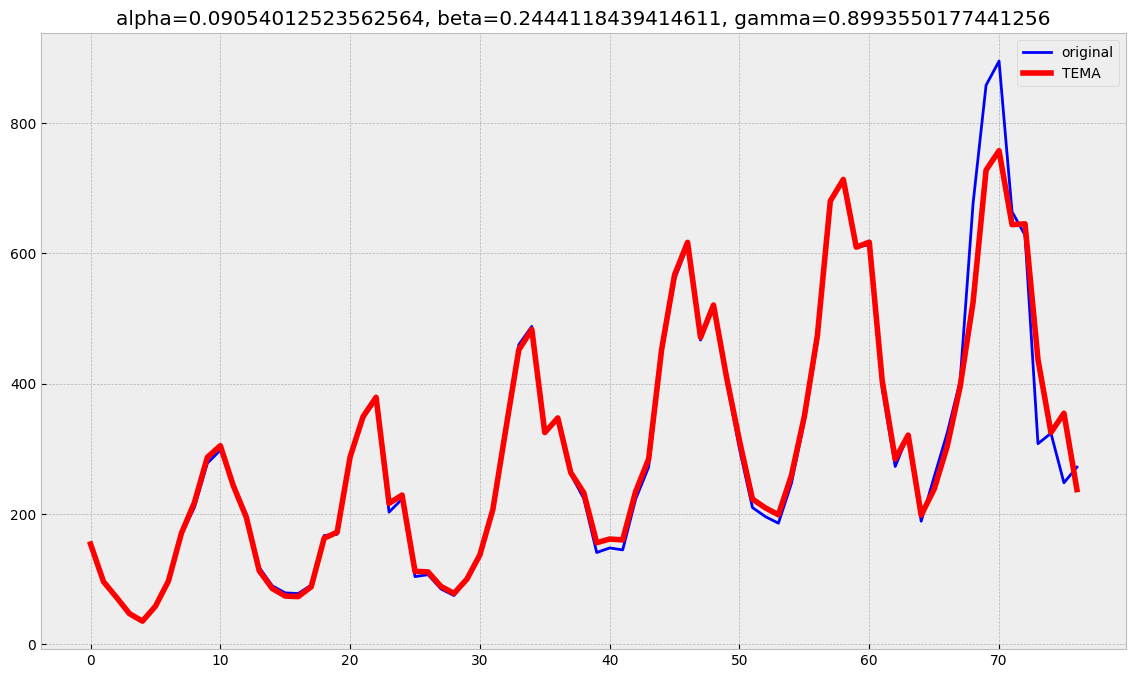

In [62]:
plot_tema(alpha_opt, beta_opt, gamma_opt, ser=train, ser_to_plot=series, n_preds=len(val))